In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
def sigmoid_derivative(output):
    return output * (1 - output)

In [4]:
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-9  # Avoid log(0)
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

In [5]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

In [6]:
# Labels for AND gate
y = np.array([[0], [0], [0], [1]])

# Initialize weights and bias
np.random.seed(42)
weights = np.random.randn(2, 1)
bias = np.zeros((1,))

# Training parameters
learning_rate = 0.1
epochs = 10000

In [7]:
for epoch in range(epochs):
    # Forward pass
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)

    # Compute loss
    loss = binary_cross_entropy(y, predictions)

    # Backward pass (gradient computation)
    dloss_dpred = predictions - y
    dpred_dz = sigmoid_derivative(predictions)

    dz = dloss_dpred * dpred_dz

    dW = np.dot(X.T, dz) / X.shape[0]
    db = np.mean(dz)

    # Update weights and bias
    weights -= learning_rate * dW
    bias -= learning_rate * db

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.7054
Epoch 1000, Loss: 0.3445
Epoch 2000, Loss: 0.2552
Epoch 3000, Loss: 0.2076
Epoch 4000, Loss: 0.1772
Epoch 5000, Loss: 0.1560
Epoch 6000, Loss: 0.1402
Epoch 7000, Loss: 0.1279
Epoch 8000, Loss: 0.1182
Epoch 9000, Loss: 0.1101


In [8]:
final_preds = sigmoid(np.dot(X, weights) + bias)
print("\nFinal predictions:")
print(np.round(final_preds, 2))


Final predictions:
[[0.  ]
 [0.12]
 [0.12]
 [0.86]]


In [9]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

In [10]:
# Manual Neural Network with 1 hidden layer (ReLU) and sigmoid output
class NeuralNet:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = X @ self.W1 + self.b1
        self.a1 = relu(self.z1)
        self.z2 = self.a1 @ self.W2 + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output, lr=0.1):
        m = y.shape[0]
        dz2 = output - y
        dW2 = self.a1.T @ dz2 / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        dz1 = (dz2 @ self.W2.T) * relu_derivative(self.z1)
        dW1 = X.T @ dz1 / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        self.W1 -= lr * dW1
        self.b1 -= lr * db1
        self.W2 -= lr * dW2
        self.b2 -= lr * db2

    def train(self, X, y, epochs=1000, lr=0.1):
        loss_history = []
        for i in range(epochs):
            output = self.forward(X)
            loss = binary_cross_entropy(y, output)
            self.backward(X, y, output, lr)
            loss_history.append(loss)
        return loss_history

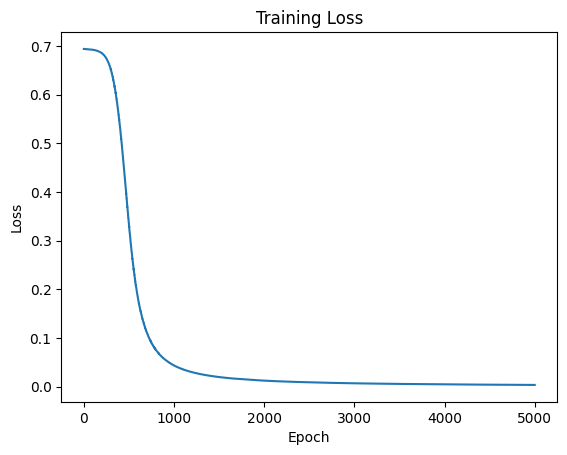

In [13]:
# Training the network on XOR
y = np.array([[0], [1], [1], [0]])

nn = NeuralNet(input_size=2, hidden_size=4, output_size=1)
losses = nn.train(X, y, epochs=5000, lr=0.1)

plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [14]:
# Predictions
preds = nn.forward(X)
print("Predictions:", np.round(preds.flatten(), 2))
print("True Labels:", y.flatten())


Predictions: [0.01 1.   1.   0.01]
True Labels: [0 1 1 0]


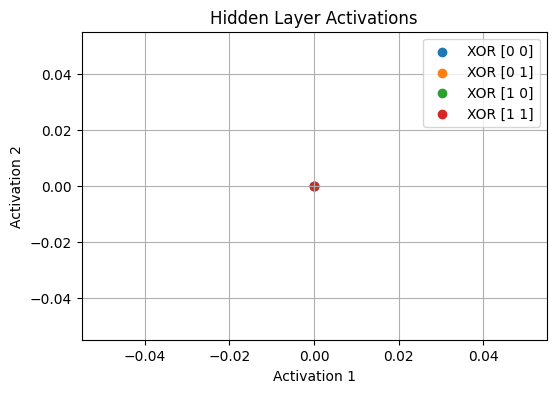

In [15]:
# Visualize Hidden Layer Activations
def plot_hidden_activations(model, X):
    activations = model.a1
    plt.figure(figsize=(6, 4))
    for i, point in enumerate(X):
        plt.scatter(activations[i, 0], activations[i, 1], label=f"XOR {point}")
    plt.xlabel("Activation 1")
    plt.ylabel("Activation 2")
    plt.title("Hidden Layer Activations")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_hidden_activations(nn, X)